# Paso 1: Cargar los datos y explorarlos


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel("/content/Base final casos 1 y 3.xlsx")
df.head(10)

,id_cliente,edad,sexo,parroquia,n_visitas,gasto_total,ultima_visita,recencia,retorno,inmunologicas,generales,citologia,especiales,medicina_ocup
0,666099193,22,Masculino,Machachi,2,106.0,2023-04-01,487,Si,No,Si,No,No,No
1,1000850949,69,Femenino,Guamani,1,137.0,2024-07-22,9,No,No,Si,No,Si,No
2,1001012838,70,Femenino,Machachi,3,58.0,2023-04-19,469,Si,No,Si,Si,No,No
3,1003432364,30,Masculino,Machachi,2,160.5,2024-04-18,104,Si,Si,Si,No,Si,No
4,1003979737,22,Femenino,Aloag,1,10.0,2023-12-03,241,No,No,Si,No,Si,No
5,1051122750,2,Femenino,NaN,1,6.0,2024-01-23,190,No,No,Si,No,No,No
6,1101046298,76,Femenino,Machachi,1,216.0,2024-01-15,198,No,No,Si,No,Si,No
7,1101823456,75,Femenino,Machachi,1,99.0,2023-05-01,457,No,No,Si,No,No,No
8,1102267554,75,Masculino,NaN,1,10.0,2023-12-09,235,No,No,Si,No,No,No
9,1103631014,45,Femenino,Machachi,1,60.0,2023-08-11,355,No,No,Si,No,No,No


In [ ]:
print(df.head())

   id_cliente  edad       sexo parroquia  n_visitas  gasto_total  \
0   666099193    22  Masculino  Machachi          2        106.0   
1  1000850949    69   Femenino   Guamani          1        137.0   
2  1001012838    70   Femenino  Machachi          3         58.0   
3  1003432364    30  Masculino  Machachi          2        160.5   
4  1003979737    22   Femenino     Aloag          1         10.0   

  ultima_visita  recencia retorno inmunologicas generales citologia  \
0    2023-04-01       487      Si            No        Si        No   
1    2024-07-22         9      No            No        Si        No   
2    2023-04-19       469      Si            No        Si        Si   
3    2024-04-18       104      Si            Si        Si        No   
4    2023-12-03       241      No            No        Si        No   

  especiales medicina_ocup  
0         No            No  
1         Si            No  
2         No            No  
3         Si            No  
4         Si       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_cliente     2305 non-null   object        
 1   edad           2305 non-null   int64         
 2   sexo           2305 non-null   object        
 3   parroquia      2134 non-null   object        
 4   n_visitas      2305 non-null   int64         
 5   gasto_total    2305 non-null   float64       
 6   ultima_visita  2305 non-null   datetime64[ns]
 7   recencia       2305 non-null   int64         
 8   retorno        2305 non-null   object        
 9   inmunologicas  2305 non-null   object        
 10  generales      2305 non-null   object        
 11  citologia      2305 non-null   object        
 12  especiales     2305 non-null   object        
 13  medicina_ocup  2305 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 252.

# Paso 2: Preparación de los datos

**Codificación de variables categóricas**

In [ ]:
# Convertir 'sexo' y 'retorno' en variables numéricas (1 para Masculino/Si, 0 para Femenino/No)
df['sexo'] = df['sexo'].map({'Masculino': 1, 'Femenino': 0})
df['retorno'] = df['retorno'].map({'Si': 1, 'No': 0})


**Seleccionar solo las columnas relevantes**

In [ ]:
X = df[['edad', 'sexo', 'n_visitas', 'gasto_total', 'recencia'] + [col for col in df.columns if col.startswith('parroquia_')]]
y = df['retorno']

In [ ]:
X.head()

,edad,sexo,n_visitas,gasto_total,recencia
0,22,1,2,106.0,487
1,69,0,1,137.0,9
2,70,0,3,58.0,469
3,30,1,2,160.5,104
4,22,0,1,10.0,241


In [ ]:
y.head()

,retorno
0,1
1,0
2,1
3,1
4,0


**Balanceo de clases**

In [ ]:
print(y.value_counts())

retorno
0    1734
1     571
Name: count, dtype: int64


In [ ]:
# Sobremuestreo usando SMOTE (Synthetic Minority Over-sampling Technique)
# (Necesita instalar la librería imblearn: !pip install imbalanced-learn)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el balance de clases después del resampleo
print(y_resampled.value_counts())

retorno
1    1734
0    1734
Name: count, dtype: int64


# Paso 3: Construcción del modelo de red neuronal

Ahora, vamos a crear una red neuronal básica con las siguientes capas:

Una capa de entrada que toma las variables independientes.
Algunas capas densas (capas completamente conectadas).
Una capa de salida con una única neurona, ya que la variable objetivo (retorno) es binaria.

In [ ]:
# Paso 1: Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Paso 2: Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Paso 3: Normalizar los datos (es importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


División del conjunto de datos: Separa los datos en un conjunto de entrenamiento (80%) y uno de prueba (20%).
Normalización: Escala las variables independientes para que tengan media 0 y desviación estándar 1 (muy importante para redes neuronales).

In [ ]:
# Paso 4: Construcción del modelo de red neuronal
model = Sequential()

# Agregar capas: 1 capa de entrada y 2 ocultas
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # 16 neuronas en la capa oculta
model.add(Dense(8, activation='relu'))  # Segunda capa oculta con 8 neuronas
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide para clasificación binaria

# Paso 5: Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Paso 6: Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5420 - loss: 0.6851 - val_accuracy: 0.8473 - val_loss: 0.5664
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.5060 - val_accuracy: 0.8991 - val_loss: 0.3616
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9410 - loss: 0.2986 - val_accuracy: 0.9899 - val_loss: 0.1783
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.1393 - val_accuracy: 0.9986 - val_loss: 0.0811
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0668 - val_accuracy: 1.0000 - val_loss: 0.0394
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0320 - val_accuracy: 1.0000 - val_loss: 0.0221
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0092
Epo

Construcción del modelo: Define una red neuronal con dos capas ocultas y una capa de salida con activación sigmoide.
Compilación: Usa la función de pérdida binary_crossentropy (para clasificación binaria) y el optimizador adam.
Entrenamiento: Entrena el modelo durante 50 épocas.

In [ ]:
# Paso 7: Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Precisión en los datos de prueba: {accuracy:.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5177e-05 
Precisión en los datos de prueba: 1.0000


In [ ]:
# Paso 8: Mostrar el historial de entrenamiento (pérdida y precisión)
import matplotlib.pyplot as plt


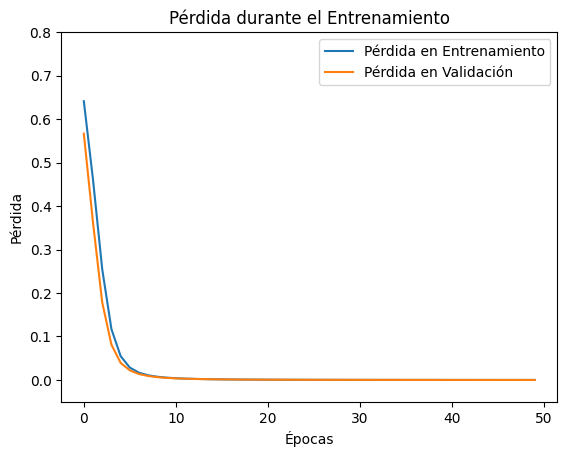

In [ ]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(-0.05, 0.8)  # Fijar el rango del eje Y para comparar mejor
plt.legend()
plt.show()


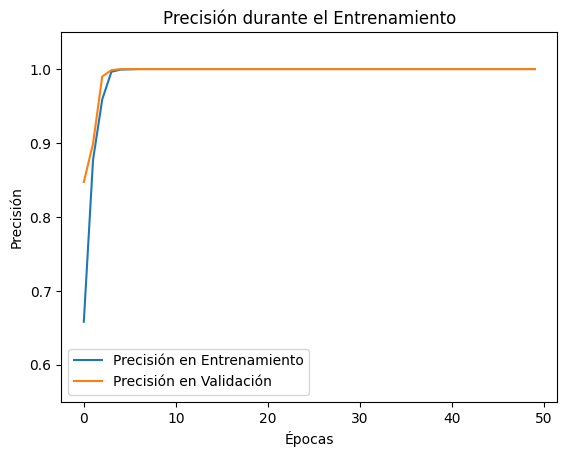

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0.55, 1.05)  # Fijar el rango del eje Y para comparar mejor
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Matriz de Confusión:
 [[364   0]
 [  0 330]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       330

    accuracy                           1.00       694
   macro avg       1.00      1.00      1.00       694
weighted avg       1.00      1.00      1.00       694



# Paso 4: Regularización

**Vamos a agregar dos tipos de regularización a nuestra red neuronal:**

**L2 Regularización** (también conocida como penalización por norma L2): Esto añadirá una penalización al crecimiento de los pesos de la red, ayudando a que los pesos no crezcan demasiado grandes y se ajusten a los datos de entrenamiento.

**Dropout**: Esto "apaga" un porcentaje aleatorio de neuronas durante el entrenamiento para prevenir que el modelo dependa demasiado de ciertas neuronas específicas.

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Paso 1: Construcción del modelo con regularización L2 y Dropout
model = Sequential()

# Capa de entrada y primera capa oculta con regularización L2
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))

# Aplicar Dropout (apagará el 30% de las neuronas en esta capa)
model.add(Dropout(0.3))

# Segunda capa oculta con regularización L2
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))

# Otra capa Dropout
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Paso 2: Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Paso 3: Entrenar el modelo (con regularización y dropout)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Paso 4: Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Precisión en los datos de prueba con regularización: {accuracy:.4f}")


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4475 - loss: 0.9303 - val_accuracy: 0.7219 - val_loss: 0.8246
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6198 - loss: 0.8149 - val_accuracy: 0.7983 - val_loss: 0.7375
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.7307 - val_accuracy: 0.8876 - val_loss: 0.6251
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7907 - loss: 0.6314 - val_accuracy: 0.9280 - val_loss: 0.4857
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8688 - loss: 0.5048 - val_accuracy: 0.9712 - val_loss: 0.3410
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9365 - loss: 0.3768 - val_accuracy: 0.9971 - val_loss: 0.2425
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.3001 - val_accuracy: 0.9986 - val_loss: 0.1878
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.2430 - val_accuracy: 1.0000 - val_loss:

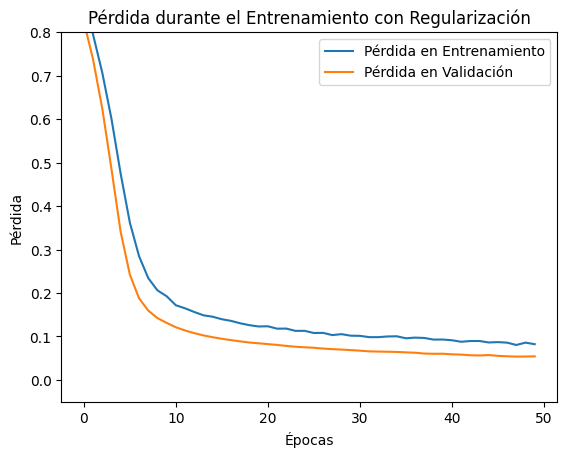

In [ ]:
# Paso 5: Mostrar el historial de entrenamiento (pérdida y precisión)
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento con Regularización')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(-0.05, 0.8)  # Fijar el rango del eje Y para comparar mejor
plt.legend()
plt.show()

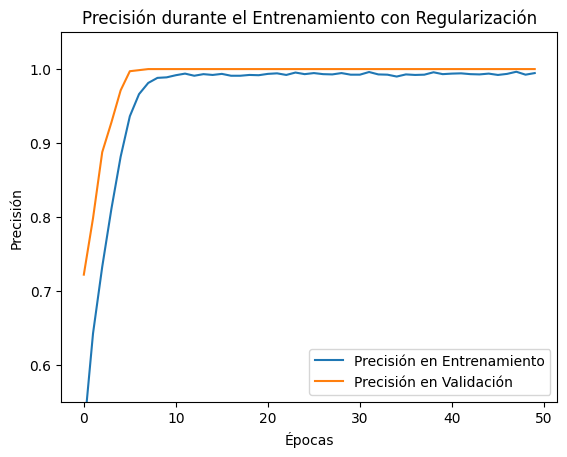

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión durante el Entrenamiento con Regularización')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0.55, 1.05)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Matriz de Confusión:
 [[364   0]
 [  0 330]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       330

    accuracy                           1.00       694
   macro avg       1.00      1.00      1.00       694
weighted avg       1.00      1.00      1.00       694



# Paso 5: Visualización

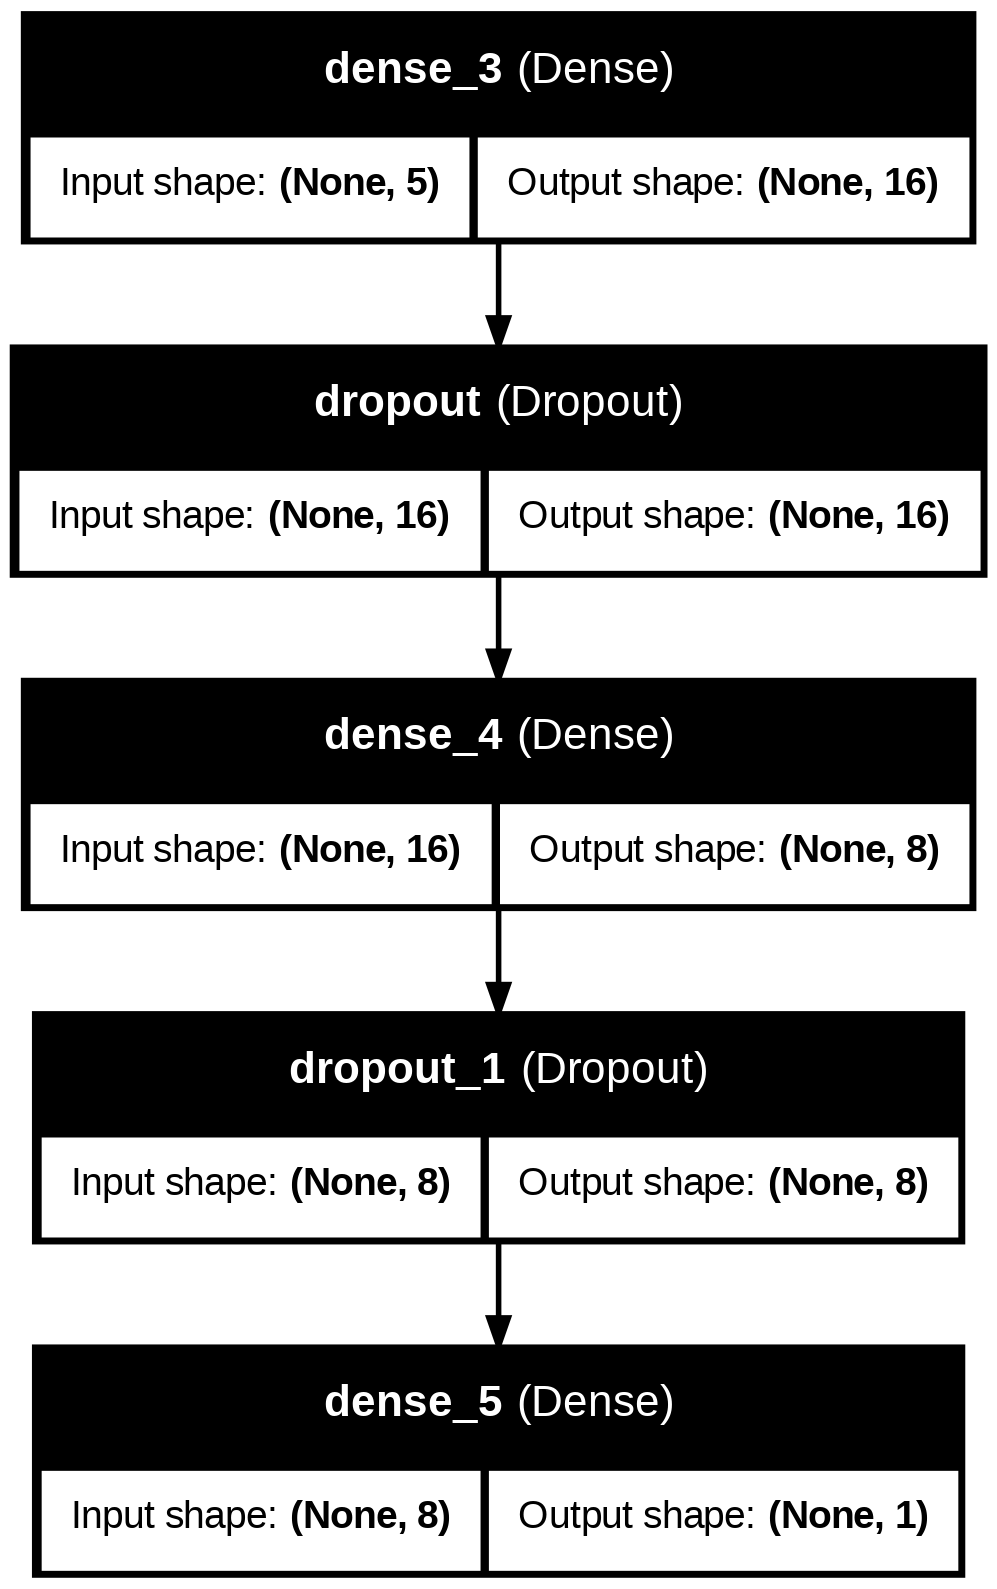

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualizar la arquitectura del modelo
plot_model(model, to_file='modelo_estructura.png', show_shapes=True, show_layer_names=True)


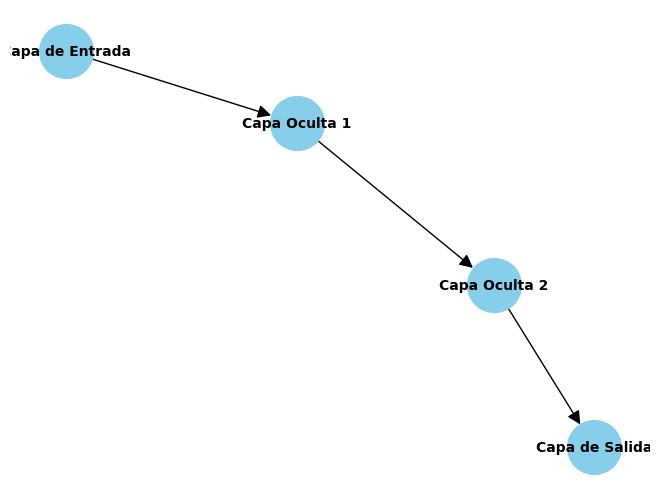

In [ ]:
# Visualizar la arquitectura del modelo
plot_model(model, to_file='modelo_estructura.png', show_shapes=True, show_layer_names=True)

# Crear un grafo dirigido
graph = nx.DiGraph()

# Agregar nodos (capas de la red neuronal)
graph.add_node("Capa de Entrada", layer_type="input", num_neurons=X_train.shape[1])
graph.add_node("Capa Oculta 1", layer_type="hidden", num_neurons=16)
graph.add_node("Capa Oculta 2", layer_type="hidden", num_neurons=8)
graph.add_node("Capa de Salida", layer_type="output", num_neurons=1)

# Agregar aristas (conexiones entre capas)
graph.add_edge("Capa de Entrada", "Capa Oculta 1")
graph.add_edge("Capa Oculta 1", "Capa Oculta 2")
graph.add_edge("Capa Oculta 2", "Capa de Salida")

# Dibujar el grafo
pos = nx.spring_layout(graph)  # Posición de los nodos
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)

# Mostrar el gráfico
plt.show()